In [59]:
import numpy as np
import scipy.signal as sig
import git.focus_stack_refinement.support_scripts as supp
import json
import matplotlib.pyplot as plt

In [77]:
with open('datasets/3.10.12.2020_voll.txt') as res_json:
    all_res = json.loads(res_json.readline())
    for key in all_res.keys():
        print(key)

Ascaris female 160x120_fast
Ascaris female 1920x1080_super_slow
Ascaris female 640x480_fast
Butterfly mouth parts 160x120_fast
Butterfly mouth parts 1920x1080_super_slow
Butterfly mouth parts 640x480_fast
Butterfly scales 160x120_fast
Butterfly scales 1920x1080_super_slow
Butterfly scales 640x480_fast
Earthworm 160x120_fast
Earthworm 1920x1080_super_slow
Earthworm 640x480_fast
Fowl feather 160x120_fast
Fowl feather 1920x1080_super_slow
Fowl feather 640x480_fast
Goldfish scale 160x120_fast
Goldfish scale 1920x1080_super_slow
Goldfish scale 640x480_fast
Honeybee leg 160x120_fast
Honeybee leg 1920x1080_super_slow
Honeybee leg 640x480_fast
Hydra c.s 160x120_fast
Hydra c.s 1920x1080_super_slow
Hydra c.s 640x480_fast
Hydra l.s 160x120_fast
Hydra l.s 1920x1080_super_slow
Hydra l.s 640x480_fast
Locust mouth parts 160x120_fast
Locust mouth parts 1920x1080_super_slow
Locust mouth parts 640x480_fast
Артерия 160x120_fast
Артерия 1920x1080_super_slow
Артерия 640x480_fast
Гладкие мышцы 160x120_fast


In [61]:
with open('datasets/10.12.2020_voll.txt') as res_json:
    all_res = json.loads(res_json.readline())

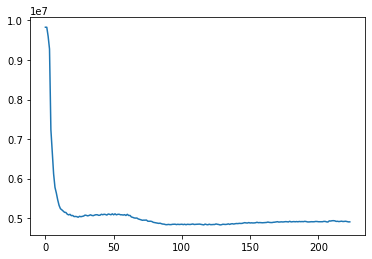

In [20]:
res = all_res['Honeybee leg 640x480']
filter_window = 5
does_plotting = True
output_plot_name = None
plt.plot(res)

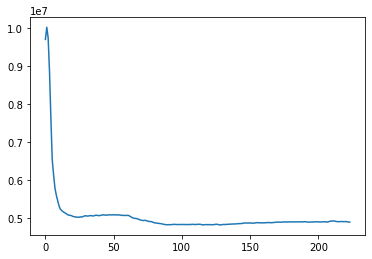

In [55]:
res_smooth = sig.savgol_filter(res, filter_window, 2)
plt.plot(res_smooth)

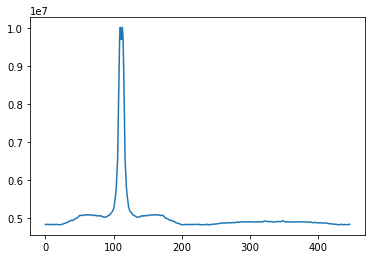

In [56]:
res_half_size = len(res_smooth) // 2
res_smooth_avg = np.min(res_smooth)  # TODO: чем дополнять? Кажется, нужно отражать, чтобы не было резких перепадов
res_smooth = np.append(np.flip(res_smooth[0: res_half_size]),
                         np.append(np.array(res_smooth),
                                   np.flip(res_smooth[res_half_size:])))
plt.plot(res_smooth)

5191348.0


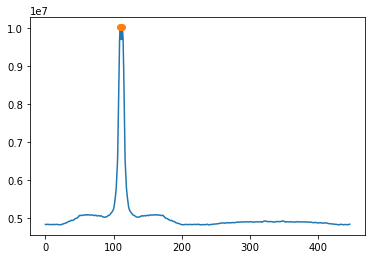

In [57]:
# define possible prominence interval
res_smooth_glob_min = np.min(res_smooth)
res_smooth_glob_max = np.max(res_smooth)
res_smooth_max_prominence = res_smooth_glob_max - res_smooth_glob_min

start_prominence = 0
end_prominence = res_smooth_max_prominence

# perform binary search: look for such a prominence p that
#                                   find_peaks(prominence=p) -> >0 (ideally = 1),
#                                   find_peaks(prominence=p+1) -> 0
found_peaks_x, peak_props = sig.find_peaks(res_smooth, width=(0, None), prominence=(start_prominence, None))
num_of_peaks = len(found_peaks_x)
while num_of_peaks != 1 and start_prominence != end_prominence:
    mid_prominence = (end_prominence + start_prominence) // 2
    found_peaks_x, peak_props = sig.find_peaks(res_smooth, width=(0, None), prominence=(mid_prominence, None))
    num_of_peaks = len(found_peaks_x)
    if num_of_peaks >= 1:
        if start_prominence == mid_prominence:
            break
        start_prominence = mid_prominence
    else:
        end_prominence = mid_prominence
print(start_prominence)
plt.plot(res_smooth)
plt.plot(found_peaks_x, np.array(res_smooth)[found_peaks_x], 'o')

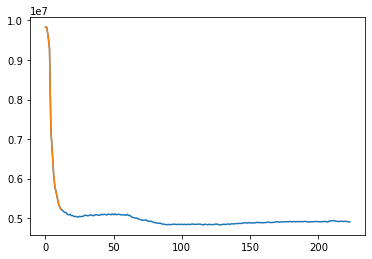

In [58]:
def transform_back(x, y, thresh_1, thresh_2):
    if (x + y) / 2 < thresh_1:
        x_m = y + 2 * (thresh_1 - y)
        y_m = x + 2 * (thresh_1 - x)
    elif (x + y) / 2 >= thresh_2:
        x_m = y + 2 * (thresh_2 - y)
        y_m = x + 2 * (thresh_2 - x)
    else:
        x_m = x
        y_m = y
    return max(x_m, thresh_1) - thresh_1, min(y_m, thresh_2) - thresh_1

# found_peaks_x can be an array, e.g. if there are two identical peak candidates
peak_lower_x = int(found_peaks_x[0] - peak_props['widths'][0])
peak_lower_y = int(found_peaks_x[0] + peak_props['widths'][0]) + 1

peak_lower_x, peak_lower_y = transform_back(peak_lower_x, peak_lower_y, res_half_size, len(res) + res_half_size)
#
peak_range = range(max(0, peak_lower_x), min(len(res), peak_lower_y))
plt.plot(res)
plt.plot(peak_range, np.array(res)[peak_range])

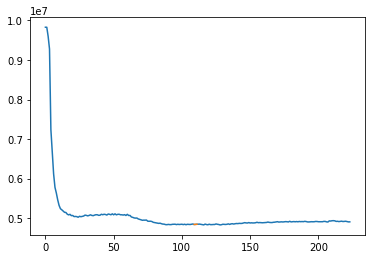

In [26]:
if does_plotting:
    plt.plot(res)
    plt.plot(peak_range, np.array(res)[peak_range])
    if output_plot_name is not None:
        plt.savefig(f'results/peak_search/{output_plot_name}.png')
    else:
        plt.show()
    plt.close()
